ΣΚΛΑΒΕΝΙΤΗΣ ΓΙΩΡΓΟΣ     
ΑΕΜ 10708

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor, lu_solve

In [30]:
#Παραγοντοποιήσεις LU και QR

def LUmine(A):
    n = A.shape[0]
    L = np.matrix( np.identity(n) )
    U = A
    for j in range(0,n-1):
        for i in range(j+1,n):
            mult = A[i,j] / A[j,j]
            A[i, j+1:n] = A[i, j+1:n] - mult * A[j, j+1:n]
            U[i, j+1:n] = A[i, j+1:n]
            L[i,j] = mult
            U[i,j] = 0
    return L, U

def QRmine(A):
    n = A.shape[0]
    Q = np.zeros((n, n))
    R = np.zeros((n, n))
    for j in range(n):
        q = A[:, j]
        for i in range(j):
            length_of_leg = np.sum( A[:,j].T * Q[:,i])
            q = q - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(q)
        Q[:, j] = q / R[j, j]
    return Q, R


[1.1102230246251565e-15]
[1.1102230246251565e-15, 6.000000000000014]
[1.1102230246251565e-15, 6.000000000000014, 150.00000000000114]
[1.1102230246251565e-15, 6.000000000000014, 150.00000000000114, 3839.999999999843]
[1.1102230246251565e-15, 6.000000000000014, 150.00000000000114, 3839.999999999843, 84279.99999994843]
[1.1102230246251565e-15, 6.000000000000014, 150.00000000000114, 3839.999999999843, 84279.99999994843, 1695960.0001481425]
[1.1102230246251565e-15, 6.000000000000014, 150.00000000000114, 3839.999999999843, 84279.99999994843, 1695960.0001481425, 36100890.149343565]
[1.1102230246251565e-15, 6.000000000000014, 150.00000000000114, 3839.999999999843, 84279.99999994843, 1695960.0001481425, 36100890.149343565, 823400431.952482]
[1.1102230246251565e-15, 6.000000000000014, 150.00000000000114, 3839.999999999843, 84279.99999994843, 1695960.0001481425, 36100890.149343565, 823400431.952482, 17788130352.123123]
[1.1102230246251565e-15, 6.000000000000014, 150.00000000000114, 3839.999999999

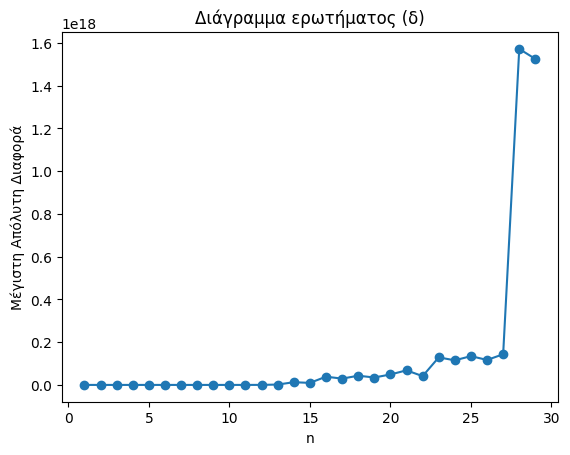

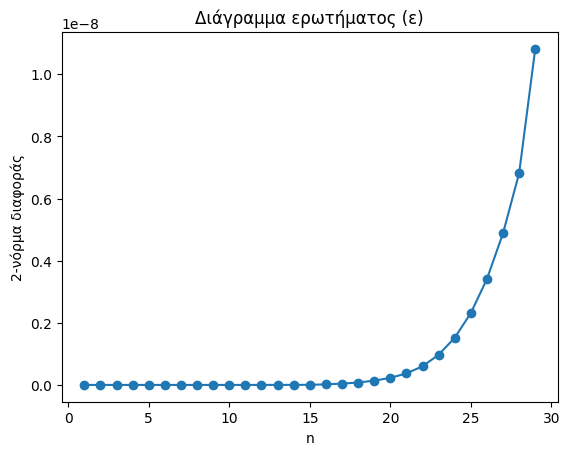

In [31]:
#Πίνακες Hilbert

def create_hilbert_matrix(n): #Δημιουργία πίνακα Hilbert - Ερώτημα (α)
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i, j] = 1 / (i + j + 1)
    return H

def solve_system(A, b): #Μέθοδος επίλυσης συστήματος - Ερώτημα (β)
    L, U = LUmine(A)
    y = np.linalg.solve(L, b)
    x = np.linalg.solve(U, y)
    return x

n_range = range(1,30) #Οι τιμές του n 
absolute_diff = [] #Δημιουργώ μία κενή λίστα, την οποία θα χρησιμοποιήσω μετά για να αποθηκεύσω τις τιμές της απόλυτης διαφοράς
twonorm_diff = [] #Όμοια, σε αυτή τη κενή λίστα θα αποθηκευτούν οι τιμές της 2-νόρμας

for n in n_range:
    H = create_hilbert_matrix(n)
    
    b = np.ones((n, 1))
    x = solve_system(H, b)
    
    b_new = b + 1e-15 #Ερώτημα (γ)
    x_new = solve_system(H, b_new) 
    difference = np.max(np.abs(x - x_new))
    absolute_diff.append(difference) #Προσθέτω κάθε τιμή της difference που δημιουργείται για τα διάφορα n στο τέλος της λίστας absolute_diff
    print(absolute_diff)
    
    H_inverse = np.linalg.inv(H) #Ερώτημα (ε)
    norm_diff = np.linalg.norm(np.identity(n) - H_inverse @ H, 2)
    twonorm_diff.append(norm_diff)

#Δημιουργία των διαγραμμάτων που ζητούνται στα ερωτήματα (δ) και (ε)
plt.plot(n_range, absolute_diff, marker='o')
plt.xlabel('n')
plt.ylabel('Μέγιστη Απόλυτη Διαφορά')
plt.title('Διάγραμμα ερωτήματος (δ)')
plt.show()

plt.plot(n_range, twonorm_diff, marker='o')
plt.xlabel('n')
plt.ylabel('2-νόρμα διαφοράς')
plt.title('Διάγραμμα ερωτήματος (ε)')
plt.show()



Συμπλήρωση ερωτήματος (γ):
    
    Παρατηρούμε ότι η μέγιστη απόλυτη διαφορά είναι σχετικά μικρό νούμερο για μικρά n.   
    Η μεταβολή που κάναμε στο διάνυσμα b είναι πολύ μικρή (10^(-15)), αλλά μπορεί να επηρεάσει την ακρίβεια της λύσης. Έτσι, αναμένουμε μια μικρή αλλαγή στη λύση x. Βέβαια όσο αυξάνει το n τόσο μεγαλύτερη γίνεται, καθώς εξαρτάται από την ακρίβεια της επίλυσης του συστήματος. Θα περιμένουμε, λοιπόν, ότι η μέγιστη απόλυτη διαφορά ανάμεσα στην αρχική λύση και την τροποποιημένη λύση θα παραμένει μικρή, ίσως με μερικές μεγαλύτερες αποκλίσεις όσο αυξάνεται το n. 

Συμπλήρωση ερωτήματος (δ): 
    
    Από το διάγραμμα προκύπτει ότι η μέγιστη απόλυτη διαφορά αυξάνεται όσο αυξάνεται το n. Αυτό δηλώνει ότι όσο μεγαλύτερο είναι το μέγεθος του πίνακα Hilbert, τόσο μεγαλύτερη είναι και η αστάθεια στους υπολογισμούς.  
    Παράλληλα παρατηρούμε την περίεργη συμπεριφορά που παρουσιάζουν οι πίνακες Hilbert, καθώς οι τάξεις μεγέθους της μέγιστης απόλυτης διαφοράς είναι πολύ μεγάλες, και το διάγραμμα δεν παρουσιάζει ομαλότητα ως προς την εναλλαγή ανάλογα με τις τιμές του n. 

Συμπλήρωση ερωτήματος (ε):

    Παρατηρούμε ξανά ότι όσο αυξάνεται το n, οι αποκλίσεις γίνονται μεγαλύτερες. Αυτό σημαίνει ότι η ακρίβεια της αντιστροφής των πινάκων Hilbert μειώνεται όσο αυξάνεται το μέγεθος του συστήματος. 
    Επομένως, η ακρίβεια υπολογισμού της αντιστροφής μειώνεται και οι προσεγγίσεις των τιμών των στοιχείων του αντίστροφου πίνακα γίνονται πιο ασταθείς.

[ 1.06840629  1.07635055  1.07272778  1.05845444  1.03442099  1.00149181
  0.96050526  0.91227364  0.85758322  0.79719419  0.73184074  0.66223098
  0.58904699  0.5129448   0.4345544   0.35447973  0.27329868  0.1915631
  0.10979879  0.02850552 -0.051843   -0.13079912 -0.20794119 -0.28287366
 -0.35522698 -0.42465767 -0.4908483  -0.55350747 -0.61236982 -0.66719606
 -0.71777293 -0.76391322 -0.80545576 -0.84226542 -0.87423314 -0.90127588
 -0.92333665 -0.94038453 -0.95241461 -0.95944804 -0.96153203 -0.95873982
 -0.95117069 -0.93894997 -0.92222906 -0.90118536 -0.87602236 -0.84696957
 -0.81428255 -0.7782429 ]
[ 1.06840629  1.07635055  1.07272778  1.05845444  1.03442099  1.00149181
  0.96050526  0.91227364  0.85758322  0.79719419  0.73184074  0.66223098
  0.58904699  0.5129448   0.4345544   0.35447973  0.27329868  0.1915631
  0.10979879  0.02850552 -0.051843   -0.13079912 -0.20794119 -0.28287366
 -0.35522698 -0.42465767 -0.4908483  -0.55350747 -0.61236982 -0.66719606
 -0.71777293 -0.76391322 -0

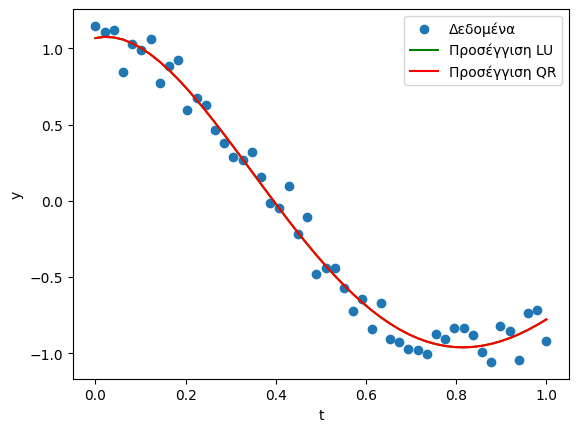

Άθροισμα τετραγωνικών σφαλμάτων (LU): 0.4735987405166536
Άθροισμα τετραγωνικών σφαλμάτων (QR): 0.47359874051665446


In [32]:
#Πρόβλημα προσέγγισης

#Χρησιμοποιώ τις συναρτήσεις της Python, ως εναλλακτική για να συγκλίνει η προσέγγιση περισσότερο. Παρακάτω παραθέτω και τον κώδικα με χρήση των συναρτήσεών σας.

t = np.linspace(0, 1, 50)
y = np.cos(4*t) + 0.1*np.random.randn(t.shape[0])

A = np.vander(t, 5, increasing=True) # Δημιουργία του πίνακα Vandermonde
A_transpose = np.transpose(A)
A_new = A_transpose @ A

lu, piv = lu_factor(A_new) #Παραγοντοποίηση LU
b = np.dot(A_transpose, y) 
x1 = lu_solve((lu, piv), b)
poly1 = np.poly1d(x1[::-1])
approximation1 = poly1(t)
print(approximation1)
errors1 = (approximation1 - y) ** 2
total_error1 = np.sum(errors1)

Q, R = np.linalg.qr(A_new) #Παραγοντοποίηση QR 
x2 = np.linalg.solve(R, Q.T @ A_transpose  @ y)
poly2 = np.poly1d(x2[::-1])
approximation2 = poly2(t)
print(approximation2)
errors2 = (approximation2 - y) ** 2
total_error2 = np.sum(errors2)

plt.scatter(t, y, label='Δεδομένα')
plt.plot(t, approximation1, 'g', label='Προσέγγιση LU')
plt.plot(t, approximation2, 'r', label='Προσέγγιση QR')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

print("Άθροισμα τετραγωνικών σφαλμάτων (LU):", total_error1)
print("Άθροισμα τετραγωνικών σφαλμάτων (QR):", total_error2)



        4         3         2
-7.394 x + 22.56 x - 18.77 x + 2.008 x + 0.8903
[ 0.89033492  0.92367759  0.94251739  0.9479589   0.94107595  0.92291155
  0.89447795  0.85675659  0.81069816  0.75722253  0.69721882  0.63154535
  0.56102964  0.48646845  0.40862774  0.32824271  0.24601774  0.16262646
  0.07871169 -0.00511452 -0.0882709  -0.17020699 -0.25040308 -0.32837027
 -0.40365043 -0.47581622 -0.54447108 -0.60924923 -0.6698157  -0.72586627
 -0.77712752 -0.82335682 -0.86434231 -0.89990293 -0.92988839 -0.95417919
 -0.97268662 -0.98535274 -0.99215041 -0.99308326 -0.98818571 -0.97752297
 -0.96119102 -0.93931664 -0.9120574  -0.87960161 -0.84216843 -0.80000774
 -0.75340025 -0.70265744]
        4         3         2
-1.456 x - 1.335 x - 1.216 x - 1.111 x - 1.227
[-1.22698556 -1.25018633 -1.27447123 -1.29991741 -1.32660809 -1.35463256
 -1.38408616 -1.41507031 -1.44769248 -1.4820662  -1.51831107 -1.55655275
 -1.59692298 -1.63955953 -1.68460625 -1.73221307 -1.78253595 -1.83573695
 -1.89198415 -1.

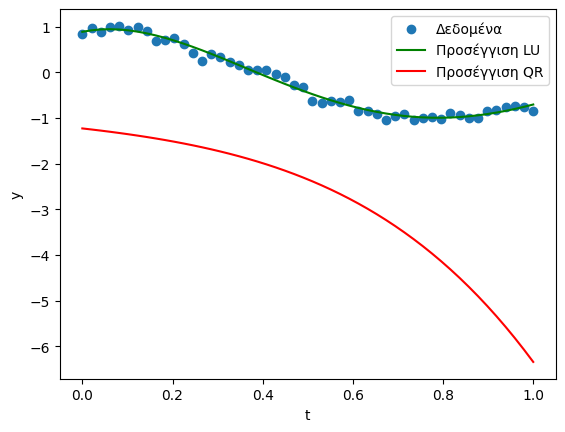

In [33]:
#Πρόβλημα προσέγγισης2
t = np.linspace(0, 1, 50)
y = np.cos(4*t) + 0.1*np.random.randn(t.shape[0])

A = np.vander(t, 5) # Δημιουργία του πίνακα Vandermonde
A_transpose = np.transpose(A)
A_new = A_transpose @ A

L, U = LUmine(A_new) #Παραγοντοποίηση LU
b = A_transpose @ y.reshape(50,1)    
z = np.linalg.solve(L, b)
x1 = np.linalg.solve(U, z).ravel()
poly1 = np.poly1d(x1)
print(poly1)
approximation1 = poly1(t)
print(approximation1)
errors1 = (approximation1 - y) ** 2
total_error1 = np.sum(errors1)

Q, R = QRmine(A_new) #Παραγοντοποίηση QR 
x2 = np.linalg.solve(R, Q.T @ A_transpose @ y)
poly2 = np.poly1d(x2)
print(poly2)
approximation2 = poly2(t)
print(approximation2)
errors2 = (approximation2 - y) ** 2
total_error2 = np.sum(errors2)

print("Άθροισμα τετραγωνικών σφαλμάτων (LU):", total_error1)
print("Άθροισμα τετραγωνικών σφαλμάτων (QR):", total_error2)

plt.scatter(t, y, label='Δεδομένα')
plt.plot(t, approximation1, 'g', label='Προσέγγιση LU')
plt.plot(t, approximation2, 'r', label='Προσέγγιση QR')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()


